## Set Defaults

## Construct `CoreSegmenter`

In [ ]:
from pathlib import Path
import numpy as np
from skimage import io

from corebreakout import defaults
from corebreakout import CoreSegmenter

MODEL_DIR = defaults.MODEL_DIR
MODEL_PATH = defaults.CB_MODEL_PATH
# Showing default kwargs:
segmenter = CoreSegmenter(
    MODEL_DIR,
    MODEL_PATH,
    model_config = defaults.DefaultConfig(),
    class_names  = defaults.CLASSES,
    layout_params= defaults.LAYOUT_PARAMS 
)

## Set images

**NOTE**: the `img`s passed to `segment()` or `segment_all()` can be paths to images, or `numpy` arrays. We're just using paths here because it's one less step, but either way works the exact same.

In [ ]:
cores = ['204-19-3a','204-19-6','204-19-7','204-20-1','204-20-1Z'
         ,'204-20-2','204-20-3','204-20-6a','204-20a-7','204-24a-6','204-24a-7']
IMAGES_PATH = Path(f'/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/DS/data/coreimage/{cores[2]}/')
# IMAGES_PATH = Path('../tests/data/two_image_dataset/')
print(IMAGES_PATH)
imgs = list(IMAGES_PATH.glob('*.jpg'))
imgs.sort()
#imgs

## `segment_all()` pairs of images and depth_ranges

In [ ]:
from pathlib import Path
import numpy as np
from skimage import io

from corebreakout import defaults
from corebreakout import CoreSegmenter

MODEL_DIR = defaults.MODEL_DIR
MODEL_PATH = defaults.CB_MODEL_PATH
# Showing default kwargs:
segmenter = CoreSegmenter(
    MODEL_DIR,
    MODEL_PATH,
    model_config = defaults.DefaultConfig(),
    class_names  = defaults.CLASSES,
    layout_params= defaults.LAYOUT_PARAMS 
)

In [ ]:
import pandas as pd
cores = ['204-19-3a','204-19-6','204-19-7','204-20-1','204-20-1Z'
         ,'204-20-2','204-20-3','204-20-6a','204-20a-7','204-24a-6','204-24a-7']
core = 11
IMAGES_PATH = Path(f'/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/DS/data/coreimage/{cores[core-1]}/')
# IMAGES_PATH = Path('../tests/data/two_image_dataset/')
print(IMAGES_PATH)
imgs = list(IMAGES_PATH.glob('*.jpg'))
imgs.sort()
#-------------------------------------------------------------------------
data = pd.read_excel(f'/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/DS/data/coreimage/{cores[core-1]}/depth.xlsx',
                     engine='openpyxl')
data = data.groupby('Unnamed: 0').agg({'top': 'min', 'bottom': 'max'}).reset_index()
depth_ranges = [(data['top'][i],data['bottom'][i]) for i in range(len(data['top']))]
depth_ranges
combined_column = segmenter.segment_all(imgs[:35], depth_ranges[:35])
combined_column.plot()
combined_column.save('/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/DS/data/preprocessed/')
# The reasoning behind the slicing is explained in the report

In [13]:
import numpy as np
from skimage import io
from corebreakout import CoreColumn
image = CoreColumn.load('/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/DS/data/preprocessed','Core8_new')
path = '/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/DS/data/preprocessed_npy/'
image.save(path, name='Core8', pickle=True, image=True, depths=True)
#This is basically how we save the preprocessed data into separate image and depth files

: 

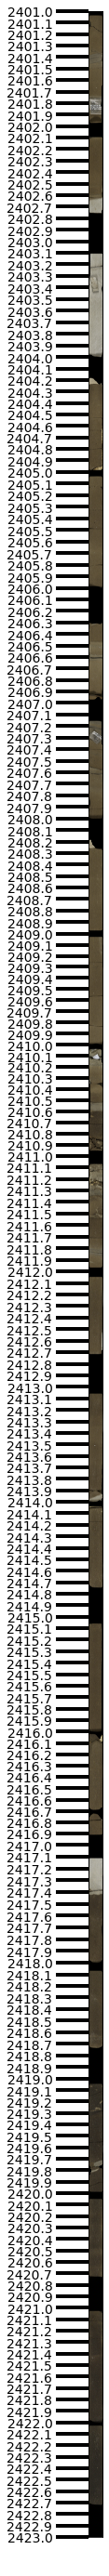

In [28]:
#image.plot(major_kwargs={("labelsize":14)})
#fix the syntax error
import matplotlib.pyplot as plt
image.plot(major_kwargs={"labelsize":14})
plt.minorticks_off()